In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets.samples_generator import make_blobs

In [60]:
X, y = make_blobs(n_samples=100, centers=2,
                 random_state=0, cluster_std=0.3)

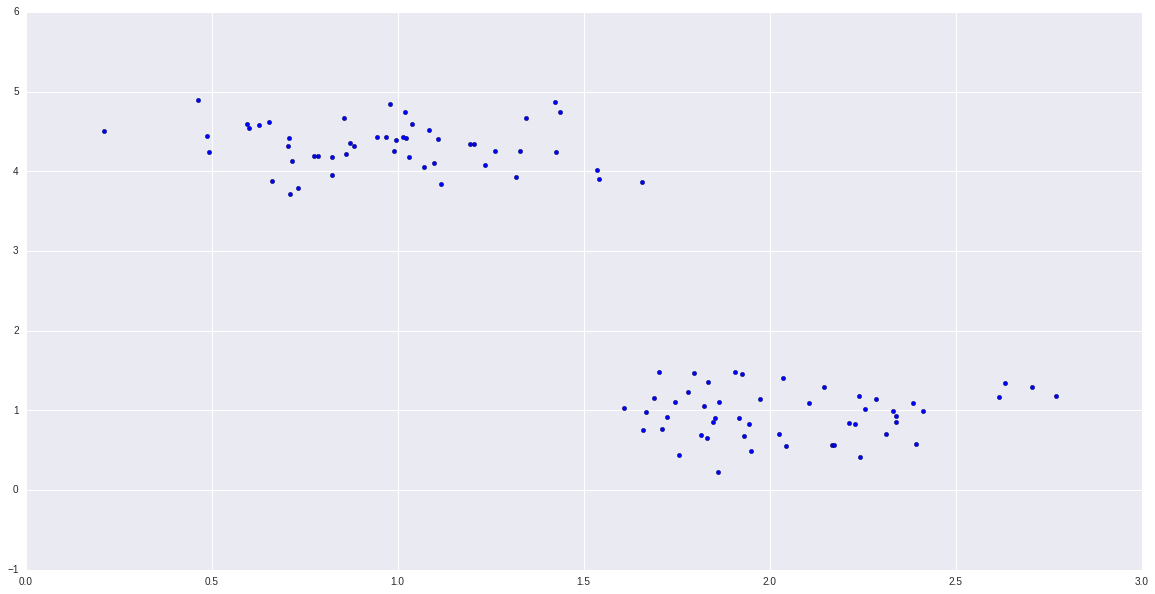

In [61]:
plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [54]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def deriv(x):
    return x*(1-x)

def check(y0, y1):
    if y0 == y1:
        return 'OK'
    return 'False'

def has_type(x, dic):
    if list(x) in [i for i in dic[0]]:
        return 0
    return 1

def draw(X, y):
    plt.figure(figsize=(20,10))
    for x,y in zip(X,y):
        if abs(round(y)) == 0:
            plt.scatter(x[0], x[1], color='red', label='class1')
        elif abs(round(y)) == 1:
            plt.scatter(x[0], x[1], color='green', label='class2')
        else:
            plt.scatter(x[0], x[1], color='blue', label='undef')
    plt.legend('best')
    plt.show()

def train(trein_y, X1):
    
    syn = 2*np.random.random((2,1))     
    y1 =  np.array([trein_y]).T
    temp_dic = {0:[],1:[], 2:[]}
    item = 1
    data = []
    sum_data = []
    for i in range(len(X1)):
        temp_dic[trein_y[i]].append(list(X1[i])) 
    
    for i in xrange(20000):
        current_x = random.choice(X1)
        current_y = has_type(current_x, temp_dic)
        sum_ = np.dot(current_x, syn)
        #sum_ = sum(map(lambda i: i*syn,current_x))
        loss = current_y - sum_
        data.append(loss)
        if item % len(X1) == 0:
            sum_data.append(sum(np.array(data) ** 2))
        #if all(item > len(X1), round(sum(np.array(data) ** 2, 3) == round(sum_data[-2], 3)):
        #       print 'stop'
        #       break
            data = []
        delta = 0.001 * np.dot(loss, [current_x]) 
        syn.T[0] += delta.T
        item += 1
    plt.figure(figsize=(20,10))
    plt.plot(sum_data)
    plt.show()
    #print sum_data
    print 'delta:{}, syn: {}, loss:{}, \n current_x:{}, current_y:{}'.format(delta, syn.T, loss, current_x, current_y)
    return syn



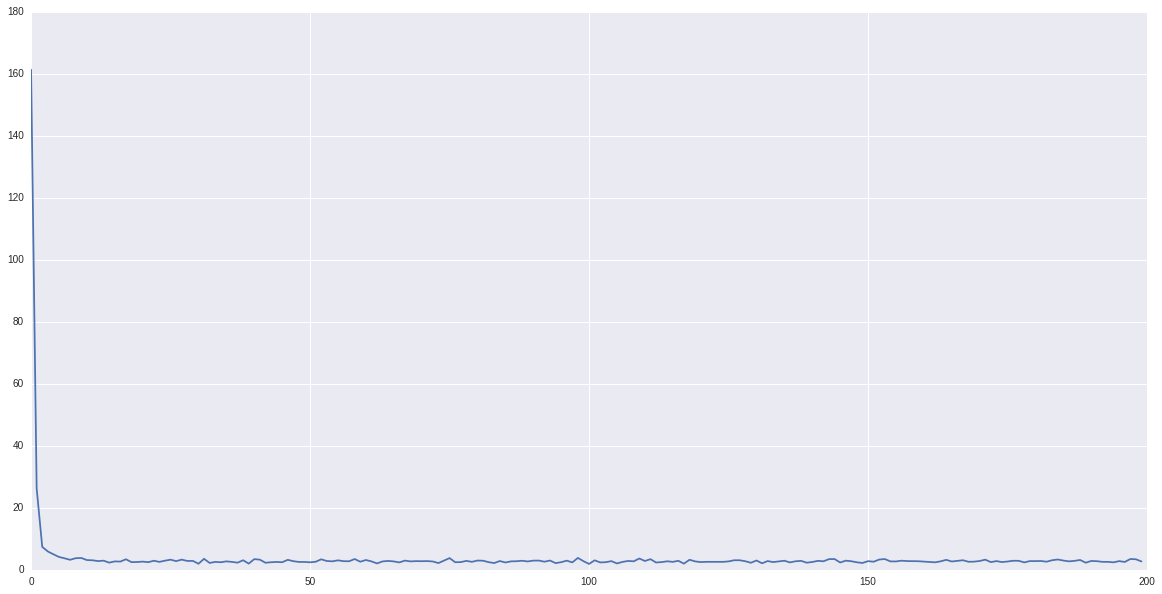

delta:[ -2.46827691e-04  -9.74539027e-05], syn: [[ 0.51470195 -0.10784462]], loss:[-0.10547769], 
 current_x:[ 2.34009376  0.92392903], current_y:1


In [62]:
up = train(y, X)

In [71]:
X, y = make_blobs(n_samples=600, centers=2,
                 random_state=0, cluster_std=0.3)

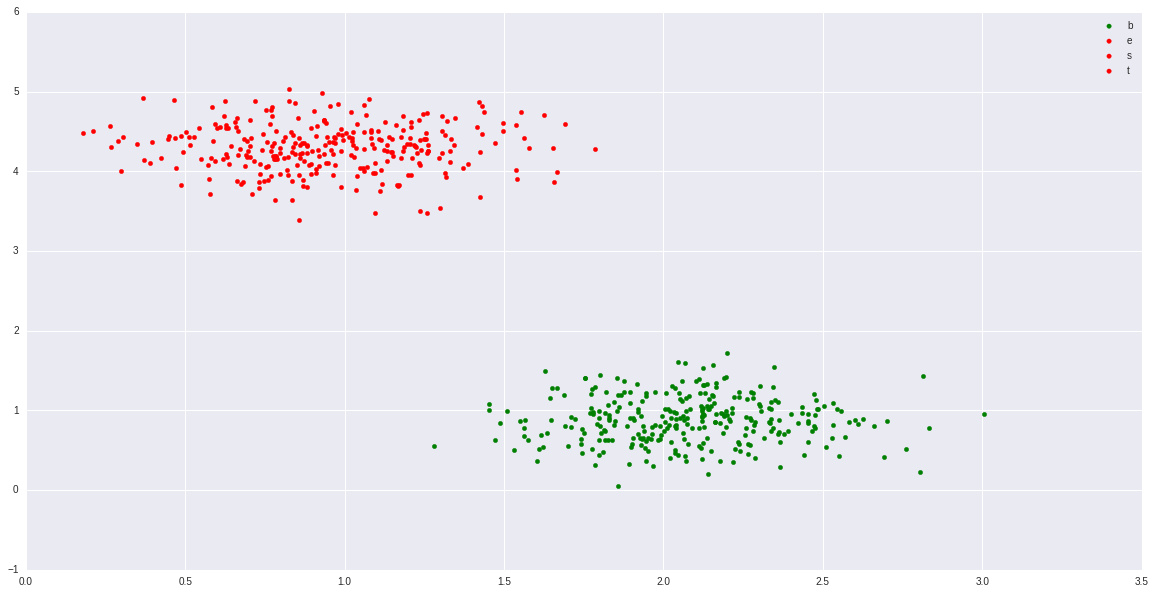

In [72]:
predict_y = np.dot(X, up)
draw(X, predict_y)